Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Ayse Sude Baki | 12211229 | 05.12.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 &ndash; Logistic Regression as a Door Opener to Deep Learning</h2>

<b>Authors:</b> Brandstetter, Schäfl, Winter, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 21-11-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u4_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u4_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> When specifying a seed for the sources of randomness, use the <code>u4.set_seed(seed=XYZ)</code> function.
</div>

In [120]:
# Required packages and the u4_utils file
import u4_utils as u4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

# Set plotting style of seaborn related plots.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u4.setup_jupyter()

In [121]:
u4.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.5 (✓)
Installed pandas version: 1.4.4 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.2 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed scipy version: 1.9.1 (✓)
Installed torch version: 1.13.0+cpu (✓)


<h2>Exercise 1</h2>

Given the dataset defined below, use the functions from <code>u4_utils.py</code> (according to the instructions given in the lecture notebook) to perform the following tasks:

<table>
    <tr>
        <th>Parameter</th>
        <th>Value (used in this notebook)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>num_pairs</code></td>
        <td>75</td>
        <td>amount of $(x, y)$ pairs to generate</td>
    </tr>
    <tr>
        <td><code>variance</code></td>
        <td>0.2</td>
        <td>variance within $y$ w.r.t. defining function</td>
    </tr>
</table>

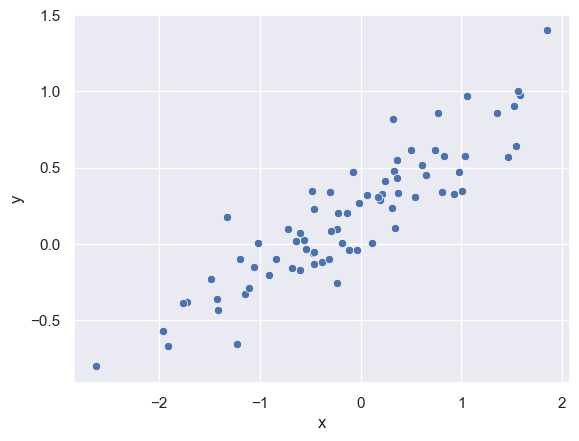

In [122]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Create dataset consisting of random (x, y) pairs.
dataset = u4.get_dataset(
    num_pairs=75,
    variance=0.2
)

# Plot the dataset.
sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 1.1. [4 Points]</b>
    <ul>
        <li>In order to find the <b>linear</b> model which best describes the given dataset, look for the optimal parameters $d$ and $k$ manually.</li>
        <li>Then, plot both the data pairs and the linear model (defined by your coefficients).</li>
        <li>For reproducibility, set a fixed seed (seed=42).</li>
    </ul>
</div>

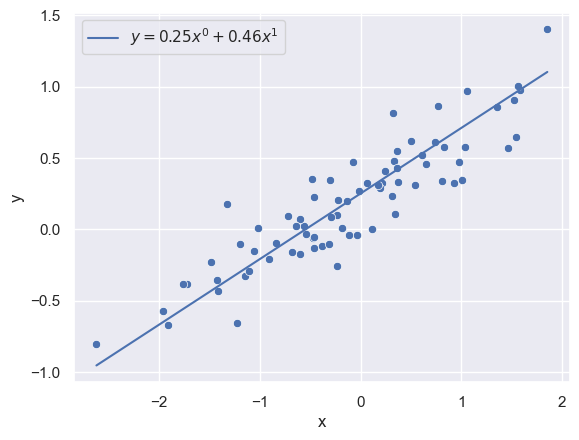

In [123]:
u4.set_seed(seed=42)

coefficients = (
    0.25,  
    0.46   
)

u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)

<div class="alert alert-warning">
    <b>Exercise 1.2. [2 Points]</b>
    <ul>
        <li>Perform the previous task but this time by setting the parameters "automatically", in a way that the <b>Mean Squared Error</b> between the linear model and the data pairs is minimized.</li>
        <li>Again, plot both the data pairs and the linear model.</li>
    </ul>

The coefficients minimizing the MSE are:
    coefficient 0: 0.2292277018526622
    coefficient 1: 0.40606448529507455


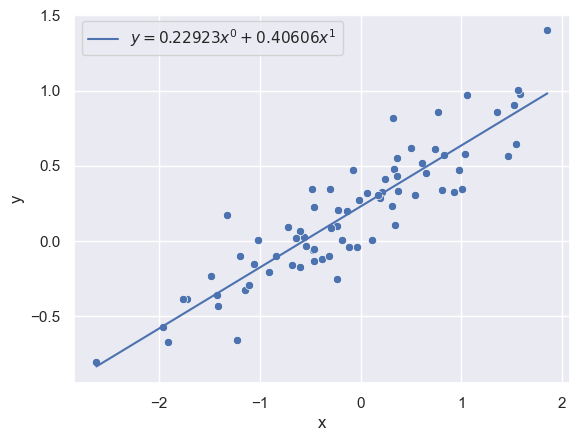

In [124]:
u4.set_seed(seed=42)

coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=1
)

print("The coefficients minimizing the MSE are:")
for i, c in enumerate(coefficients):
    print(f"    coefficient {i}: {c}")

u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)

<div class="alert alert-warning">
    <b>Exercise 1.3. [2 Points]</b>
    <ul>
        <li>Assume that the automatically found parameter values differ from the true, underlying parameter values.</li>
        <li>Briefly describe at least two possible reasons for this behavior.</li>
    </ul>
</div>

In [125]:
# your answer goes here (you may use a markdown cell)

<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=43).
</div>

<div class="alert alert-warning">
    <b>Exercise 2.1. [6 Points]</b>
    <ul>
        <li>Generate a new dataset considering the characteristics defined below and plot both the dataset and the underlying model.</li>
        <table>
            <tr>
                <th>Parameter</th>
                <th>Value (used in this notebook)</th>
                <th>Description</th>
            </tr>
            <tr>
                <td><code>num_pairs</code></td>
                <td>25</td>
                <td>amount of $(x, y)$ pairs to generate</td>
            </tr>
            <tr>
                <td><code>variance</code></td>
                <td>0.5</td>
                <td>variance within $y$ w.r.t. defining function</td>
            </tr>
            <tr>
                <td><code>coefficients</code></td>
                <td><code>np.random.rand(4)</code></td>
                <td>upper bound of random polynomial degree</td>
            </tr>
        </table>
        <li>When defining the dataset, pass the random coefficients for the underlying model via the parameter <code>coefficients</code>. Also make sure to use the same random coefficients for plotting.</li>
    </ul>
</div>

<AxesSubplot:xlabel='x', ylabel='y'>

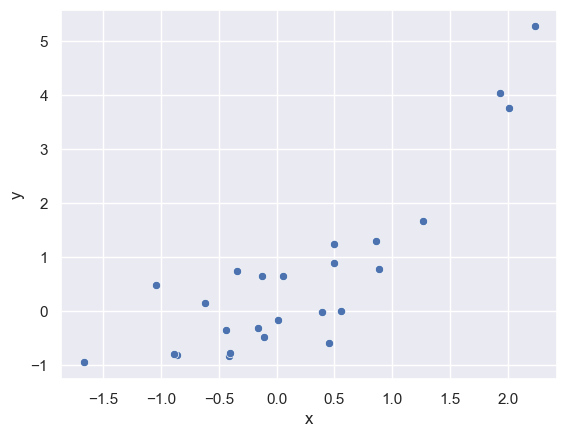

In [126]:
u4.set_seed(seed=43)

rand_coeff = (np.random.rand(4))

dataset = u4.get_dataset(
    num_pairs=25,
    variance=0.5,
    coefficients=rand_coeff
)

sns.scatterplot(data=dataset, x="x", y="y")

<div class="alert alert-warning">
    <b>Exercise 2.2. [6 Points]</b>
    <ul>
        <li>Define a model by "automatically" retrieving the optimal coefficients which minimize the MSE.</li>
        <li>Then, print out the optimal coefficients and plot both the data pairs and the optimized model.</li>
    </ul>
</div>

The coefficients minimizing the MSE are:
    coefficient 0: 0.013059276084229155
    coefficient 1: 0.586768114768054
    coefficient 2: 0.35608861823846144
    coefficient 3: 0.18533539712284616


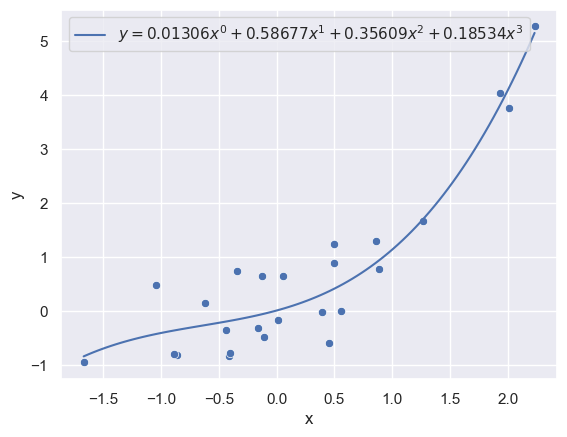

In [127]:
u4.set_seed(seed=43)

coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=3
)

print("The coefficients minimizing the MSE are:")
for i, c in enumerate(coefficients):
    print(f"    coefficient {i}: {c}")
    
u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)

<div class="alert alert-warning">
    <b>Exercise 2.3. [4 Points]</b>
    <ul>
        <li>Compute and print out the difference between the random coefficients from the underlying model (used to generate the dataset) and the optimal coefficients ("automatically" computed) which minimize the MSE.</li>
    </ul>
</div>

In [128]:
print("The diffecence between the random coefficients and the optimal coefficients of MSE are:") 
for i, c in enumerate(coefficients): 
    difference = abs(rand_coeff[i] - c)
    print(f"coefficient {i}: {difference}")

The diffecence between the random coefficients and the optimal coefficients of MSE are:
coefficient 0: 0.1019952903055498
coefficient 1: 0.022298424511427384
coefficient 2: 0.22269765405247316
coefficient 3: 0.055254222842502615


<div class="alert alert-warning">
    <b>Exercise 2.4. [1 Points]</b>
    <ul>
        <li>Visually inspect the previous plot and keep the (possible) differences in parameter values in mind, which regions are especially prone to high errors?</li>
        <li>Please keep in mind that "prone to" does not automatically and always imply "guaranteed to".</li>
        <li>You do not need to set a seed for this task.</li>
    </ul>
</div>

In [129]:
# your code goes here (you may use a markdown cell)

<h2>Exercise 3</h2>

In this exercise, we will consider that $y$ is a binary variable, i.e., the label of each data point is either 0 or 1. Under this premise, we will create a new dataset.

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Following the lecture notebook, choose the correct function from <code>u4_utils.py</code> to generate a dataset with binary labels consisting of 15 data pairs (feature, label). Then, plot it.</li>
        <li>For reproducibility, choose a fixed random seed of seed=43.</li>
    </ul>
</div>

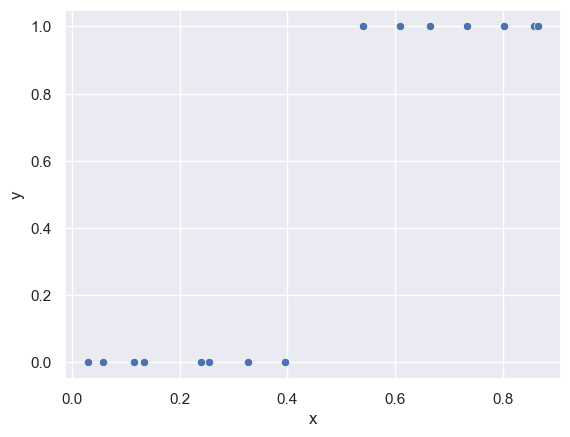

In [130]:
u4.set_seed(seed=43)

dataset = u4.get_dataset_logistic(
    num_pairs=15
)

sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Use the corresponding function in <code>u4_utils.py</code> to minimize the cross entropy loss and choose the combination of hyperparameters that enables the logistic regression model to best separate the two classes.</li>
        <li>Then, plot the dataset and the logistic regression model. Retrieve the optimal combination by taking the following values for each hyperparameter into account:</li>
        <table style="text-align:center;vertical-align:middle">
            <th>Hyperparameter</th>
            <th>Values</th>
            <tr>
                <td><code>iterations</code></td>
                <td>10, 100</td>
            </tr>
            <tr>
                <td><code>learning_rate</code></td>
                <td>0.1, 1.0, 10.0</td>
            </tr>
            <tr>
                <td><code>momentum</code></td>
                <td>0.0, 0.8</td>
            </tr>
        </table>
        <li>For determining the best hyperparameters in this example, it is enough to simply look at the resulting model plot, i.e., you do not have to make any computations, a visual check is sufficient.</li>
    </ul>
</div>

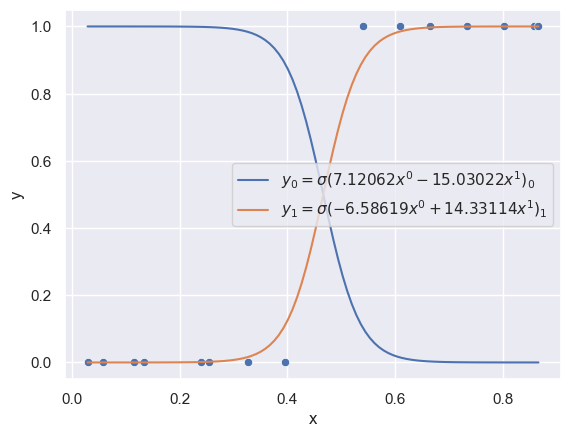

In [131]:
u4.set_seed(seed=43)

coefficients = u4.minimize_ce(
    dataset=dataset,
    iterations=100,
    learning_rate=10,
    momentum=0.8
)

u4.plot_logistic_model(
    dataset=dataset,
    coefficients=coefficients
)

<h2>Exercise 4</h2>

Considering again a binary classification problem, we will now workwith the <code>DataSet_LR_a.csv</code> (same as in the lecture notebook).

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Load and process the dataset as shown in the lecture notebook but this time considering 65% (parameter <code>frac</code>) of the samples for training and 35% for testing.</li>
        <li>For reproducibility, set a seed=43.</li>
    </ul>
</div>

In [132]:
u4.set_seed(seed=43)

dataset = u4.get_dataset_from_csv(path='resources/Dataset_LR_a.csv')
dataset_train = dataset.sample(frac=0.65, replace=False, axis=0)
dataset_test = dataset.drop(dataset_train.index)

<div class="alert alert-warning">
    <b>Exercise 4.2. [8 Points]</b>
    <ul>
        <li>Considering <code>iterations=750</code> and <code>momentum=0.95</code> and by using the function to minimize the cross entropy loss, find a learning rate that enables the logistic regression model to achieve an accuracy on the <b>test set</b> higher than 85.5%.</li>
        <li>Print out the model's accuracy.</li>
        <li>For reproducibility, set a seed=43.</li>
    </ul>
</div>

In [133]:
u4.set_seed(seed=43)

coefficients = u4.minimize_ce(
    dataset=dataset_train,
    iterations=750,
    learning_rate=2,
    momentum=0.95
)

predictions = u4.predict_logistic(dataset_train.drop(columns="y"), coefficients)

predictions_test = u4.predict_logistic(dataset_test.drop(columns="y"), coefficients)

accuracy_train = (predictions == dataset_train["y"]).mean()
accuracy_test = (predictions_test == dataset_test["y"]).mean()

print(f"Accuracy on training set: {accuracy_train:.4f}")
print(f"Accuracy on test set: {accuracy_test:.4f}")

Accuracy on training set: 0.9359
Accuracy on test set: 0.8571


<div class="alert alert-warning">
    <b>Exercise 4.3. [8 Points]</b>
    <ul>
        <li>Plot the 2D test dataset, once showing the true, actual labels (ground truth) and once showing the predicted labels.</li>
    </ul>
</div>

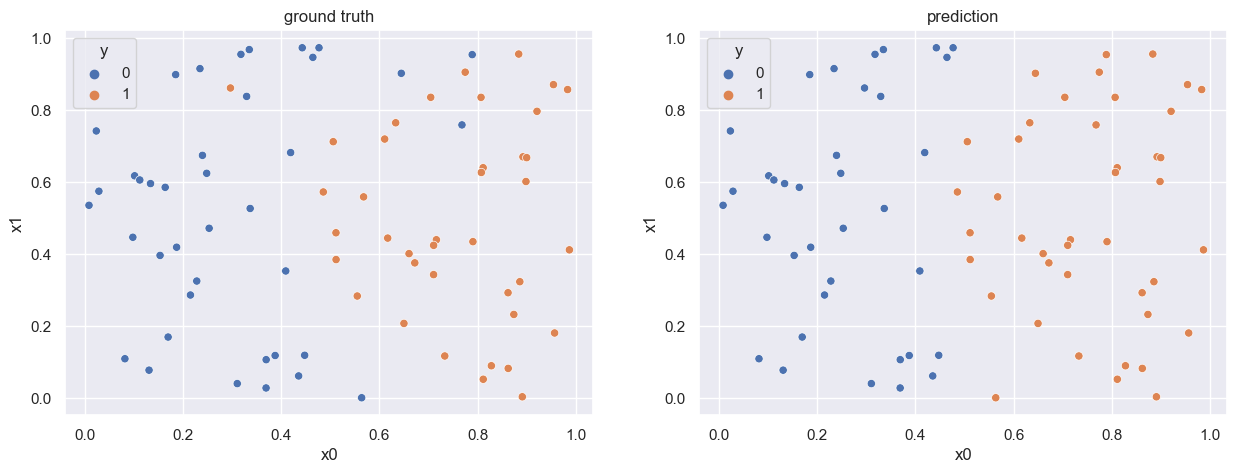

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].set_title("ground truth")
sns.scatterplot(data=dataset_train, x="x0", y="x1", hue="y", ax=axes[0])

axes[1].set_title("prediction")
sns.scatterplot(data=dataset_train.assign(y=predictions), x="x0", y="x1", hue="y", ax=axes[1])
plt.show()

<h2>Exercise 5</h2>

Considering the framework PyTorch and the instructions given in the lecture notebook, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Generate a tensor of 2 dimensions with a shape of 2 x 5, containing random numbers from a standard normal distribution with (mean=0 and stddev=variance=1).</li>
        <li>Print out the tensor and its shape to be sure that your answer is correct.</li>
        <li>For reproducibility, set seed=43.</li>
    </ul>
</div>

In [135]:
u4.set_seed(seed=43)

shape = (
    2,  
    2,  
    5   
)

x = torch.randn(shape)
print(x)
print(x.shape)

tensor([[[-0.0166, -0.4668,  2.0909,  0.6149,  0.3083],
         [-0.2947, -0.7662, -0.9962, -0.2345, -0.5367]],

        [[ 1.1296,  0.1054, -0.3630,  1.5822, -0.4430],
         [ 1.8462, -0.4772, -1.8291, -0.6145,  1.0282]]])
torch.Size([2, 2, 5])


<div class="alert alert-warning">
    <b>Exercise 5.2. [5 Points]</b>
    <ul>
        <li>Implement the function $g\left(x\right) = 2.5\cdot{}{x}^3$ related to the previously generated tensor using PyTorch.</li>
        <li>Print the output of the function considering as input the tensor you have created in the first task of this exercise.</li>
    </ul>
</div>

In [136]:
def g(x: torch.Tensor) -> torch.Tensor:
    return 2.5 * x** 3

print(g(x))

tensor([[[-1.1443e-05, -2.5428e-01,  2.2853e+01,  5.8125e-01,  7.3236e-02],
         [-6.3965e-02, -1.1246e+00, -2.4713e+00, -3.2242e-02, -3.8657e-01]],

        [[ 3.6029e+00,  2.9233e-03, -1.1958e-01,  9.9026e+00, -2.1727e-01],
         [ 1.5732e+01, -2.7161e-01, -1.5298e+01, -5.8023e-01,  2.7175e+00]]])


<div class="alert alert-warning">
    <b>Exercise 5.3. [5 Points]</b>
    <ul>
        <li>Compute the gradient of the previously defined function $g\left(x\right)$ for $x = 0.35$ using the automatic differentiation functionality of PyTorch.</li>
        <li>Following the lecture notebook, print $x$ as a tensor, the output of the function $g(x)$, and the gradient $g'(x)$.</li>
    </ul>
</div>

In [137]:
x = torch.tensor(0.35, requires_grad=True)
print(f'x     = {x}')

y = g(x)
print(f'g(x)  = {y}')

dy = torch.autograd.grad(y, x)
print(f"g'(x) = {dy[0].item()}")

x     = 0.3499999940395355
g(x)  = 0.10718749463558197
g'(x) = 0.9187499284744263


<h2>Exercise 6</h2>

With the MNIST dataset, perform the following tasks:

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=43).
</div>

<div class="alert alert-warning">
    <b>Exercise 6.1. [5 Points]</b>
    <ul>
        <li>Set the following hyperparameters (hint: <code>epochs</code> is the same as <code>iterations</code>):</li>
    </ul>

Hyperparameter | Value
:--- | :---
`batch_size` | 7
`epochs` | 2
`learning_rate` | 0.001
`momentum` | 0.1
</div>

In [138]:
u4.set_seed(seed=43)

from torchvision.datasets import MNIST
from types import SimpleNamespace 
from itertools import islice 

hyperparameters = SimpleNamespace(
    batch_size=7,
    epochs=2,
    learning_rate=0.001,
    momentum=0.1
)

<div class="alert alert-warning">
    <b>Exercise 6.2. [5 Points]</b>
    <ul>
        <li>As shown in the lecture notebook, get the data loaders for the training and test MNIST data. Fetch the samples and targets.</li>
    </ul>
</div>

In [139]:
train_loader, test_loader = u4.get_dataset_mnist(
    batch_size=hyperparameters.batch_size
)

samples = torch.stack([x for x, y in train_loader.dataset]).flatten(start_dim=1)
targets = train_loader.dataset.targets

print(train_loader.dataset.data.shape)
print(test_loader.dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


<div class="alert alert-warning">
    <b>Exercise 6.3. [7 Points]</b>
    <ul>
        <li>Minimize the cross entropy loss using the training data to get the coefficients of the logistic model.</li>
        <li>Get the predictions for the test data using this model and print the accuracy on the test set.</li>
    </ul>
</div>

In [140]:
coefficients = u4.minimize_ce(
    dataset=train_loader,
    iterations=hyperparameters.epochs,
    learning_rate=hyperparameters.learning_rate,
    momentum=hyperparameters.momentum
)

samples_test = torch.stack([x for x, _ in test_loader.dataset]).flatten(start_dim=1)
targets_test = test_loader.dataset.targets

predictions = u4.predict_logistic(samples, coefficients)
predictions_test = u4.predict_logistic(samples_test, coefficients)

accuracy = (predictions == targets.numpy()).mean()
accuracy_test = (predictions_test == targets_test.numpy()).mean()

print(f"Accuracy on training set: {accuracy_train:.4f}")
print(f"Accuracy on test set: {accuracy_test:.4f}")

Accuracy on training set: 0.9359
Accuracy on test set: 0.8914


<div class="alert alert-warning">
    <b>Exercise 6.4. [12 Points]</b>
    <ul>
        <li>Keeping <code>batch_size=7</code> and <code>epochs=2</code>, optimize the other two hyperparameters <code>learning_rate</code> and/or <code>momentum</code> in a way that you achieve a better performance (accuracy). Then, print out the results.</li>
        <li>Hint: You might consider some of the concepts learned in the previous units to automatize this process.</li>
        <li>Hint: Do not forget to set the seed if you want reproducible and comparable results.</li>
    </ul>
</div>

In [141]:
u4.set_seed(seed=43)

momentum_values = [0.1, 0.3, 0.8]

hyperparameters_list = []
for i in momentum_values:
    hyperparameters = SimpleNamespace(
        batch_size=7, epochs=2, learning_rate=0.001, momentum=i
    )

    hyperparameters_list.append(hyperparameters)

for hyperparameters in hyperparameters_list:

    coefficients = u4.minimize_ce(
        dataset=train_loader,
        iterations=hyperparameters.epochs,
        learning_rate=hyperparameters.learning_rate,
        momentum=hyperparameters.momentum,
        use_cuda_if_available=True,
    )
 
    samples_test = torch.stack([x for x, _ in test_loader.dataset]).flatten(start_dim=1)
    targets_test = test_loader.dataset.targets

    predictions = u4.predict_logistic(samples, coefficients)
    predictions_test = u4.predict_logistic(samples_test, coefficients)
    
    accuracy = (predictions == targets.numpy()).mean()
    accuracy_test = (predictions_test == targets_test.numpy()).mean()

    print(f"---Accuracy on sets with momentum---: {hyperparameters.momentum:.4f}")
    print(f"Accuracy on training set: {accuracy_train:.4f}")
    print(f"Accuracy on test set: {accuracy_test:.4f}")
    print(f"------------------------------------")

---Accuracy on sets with momentum---: 0.1000
Accuracy on training set: 0.9359
Accuracy on test set: 0.8919
------------------------------------
---Accuracy on sets with momentum---: 0.3000
Accuracy on training set: 0.9359
Accuracy on test set: 0.8867
------------------------------------
---Accuracy on sets with momentum---: 0.8000
Accuracy on training set: 0.9359
Accuracy on test set: 0.9129
------------------------------------
